## Final Project Submission

Please fill out:
* Student name: Matthew Gittings 
* Student pace: full time
* Scheduled project review date/time: 03/11/2022
* Instructor name: Praveed Gowtham
* Blog post URL:


In [ ]:
pip install seaborn

In [74]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import csv
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns

Importing in first data file bom.movie_gross.csv

In [2]:
movie_gross= pd.read_csv('zippedData/bom.movie_gross.csv')

In [3]:
movie_gross.shape

(3387, 5)

In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Deleteing cells from the movie_gross file which do not have value.

In [6]:
movie_gross.dropna(inplace=True)

In [7]:
movie_gross['studio'].value_counts()

Uni.      144
Fox       134
WB        130
Sony      105
BV        104
         ... 
CZ          1
LD          1
Arth.       1
ICir        1
Rocket      1
Name: studio, Length: 172, dtype: int64

Changing data to be able to combine foreign and domestic gross

In [8]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')

In [9]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(float)

In [10]:
total_gross = movie_gross['foreign_gross'] + movie_gross['domestic_gross']

In [11]:
movie_gross.insert(4, "total_gross",total_gross, True)

In [12]:
movie_gross.sort_values(by='total_gross',ascending=False)

,title,studio,domestic_gross,foreign_gross,total_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,2015
3080,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,2018
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,1.341500e+09,2011
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2017
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700.0,13200.0,2.190000e+04,2011
322,The Thorn in the Heart,Osci.,7400.0,10500.0,1.790000e+04,2010
1110,Cirkus Columbia,Strand,3500.0,9500.0,1.300000e+04,2012
715,Aurora,CGld,5700.0,5100.0,1.080000e+04,2011


Importing movie_budgets

In [13]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [14]:
movie_budgets.shape

(5782, 6)

In [15]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
movie_budgets = movie_budgets.rename(columns={'movie':'title'})

In [17]:
movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
movie_budgets.shape

(5782, 6)

Now removing NaN's from the movie budget file

In [19]:
movie_budgets.dropna(inplace=True)

In [20]:
movie_budgets.shape

(5782, 6)

Cleaning up value columns to be able to perform calculations

In [21]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')

In [22]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [23]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')

In [24]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)
movie_budgets['worldwide_gross'].head()

0    2.776345e+09
1    1.045664e+09
2    1.497624e+08
3    1.403014e+09
4    1.316722e+09
Name: worldwide_gross, dtype: float64

Creating column of Return on Investment through dividing the gross by the budget. 

In [25]:
roi = movie_budgets['worldwide_gross']/ movie_budgets['production_budget']
roi

0         6.532577
1         2.546673
2         0.427892
3         4.243841
4         4.153696
           ...    
5777      0.000000
5778     40.082500
5779      0.267600
5780      0.000000
5781    164.582727
Length: 5782, dtype: float64

In [26]:
prod_budget = movie_budgets['production_budget']

In [27]:
budget = movie_budgets['production_budget'].sort_values(ascending=False)

Importing data file form IMDB - imdb.title.basics.csv - this will pull in genres for us. 

In [28]:
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv')

In [29]:
title_basics = title_basics.rename(columns={'primary_title':'title','start_year':'year'})

In [30]:
title_basics.head()

,tconst,title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
title_basics['genres'].value_counts()

Documentary                 32185
Drama                       21486
Comedy                       9177
Horror                       4372
Comedy,Drama                 3519
                            ...  
Short,Thriller                  1
Musical,Mystery,Thriller        1
Comedy,Sport,Thriller           1
Music,Mystery                   1
Adventure,History,News          1
Name: genres, Length: 1085, dtype: int64

In [32]:
title_basics.shape

(146144, 6)

In [33]:
movie_gross.shape

(2007, 6)

In [34]:
outer_merged = movie_gross.merge(title_basics,on=["title","year"])

In [35]:
outer_merged.shape

(1268, 10)

In [36]:
df = outer_merged.merge(movie_budgets,on=['title'])

In [37]:
df.shape

(961, 15)

In [38]:
df.head(10)

,title,studio,domestic_gross_x,foreign_gross,total_gross,year,tconst,original_title,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,1.067000e+09,2010,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000.0,8.283000e+08,2010,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,7.526000e+08,2010,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,6.985000e+08,2010,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,6.239000e+08,2010,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",170000000.0,"$312,433,331",6.211564e+08
5,Tangled,BV,200800000.0,391000000.0,5.918000e+08,2010,tt0398286,Tangled,100.0,"Adventure,Animation,Comedy",15,"Nov 24, 2010",260000000.0,"$200,821,936",5.864772e+08
6,Despicable Me,Uni.,251500000.0,291600000.0,5.431000e+08,2010,tt1323594,Despicable Me,95.0,"Animation,Comedy,Family",50,"Jul 9, 2010",69000000.0,"$251,513,985",5.434646e+08
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,4.949000e+08,2010,tt0892769,How to Train Your Dragon,98.0,"Action,Adventure,Animation",30,"Mar 26, 2010",165000000.0,"$217,581,232",4.948710e+08
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,4.157000e+08,2010,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,113.0,"Adventure,Family,Fantasy",48,"Dec 10, 2010",155000000.0,"$104,386,950",4.181870e+08
9,The Karate Kid,Sony,176600000.0,182500000.0,3.591000e+08,2010,tt1155076,The Karate Kid,140.0,"Action,Drama,Family",77,"Jun 11, 2010",40000000.0,"$176,591,618",3.517749e+08


In [39]:
df = df.sort_values(by='total_gross',ascending=False)

In [40]:
df.corr()

,domestic_gross_x,foreign_gross,total_gross,year,runtime_minutes,id,production_budget,worldwide_gross
domestic_gross_x,1.000000,0.789275,0.910901,0.114329,0.286181,-0.048471,0.677983,0.933633
foreign_gross,0.789275,1.000000,0.972319,0.113146,0.284351,-0.057701,0.748327,0.893680
total_gross,0.910901,0.972319,1.000000,0.119537,0.300001,-0.057218,0.760851,0.955806
year,0.114329,0.113146,0.119537,1.000000,0.107017,0.046211,0.062615,0.131147
runtime_minutes,0.286181,0.284351,0.300001,0.107017,1.000000,-0.004758,0.347388,0.303172
id,-0.048471,-0.057701,-0.057218,0.046211,-0.004758,1.000000,-0.090832,-0.064152
production_budget,0.677983,0.748327,0.760851,0.062615,0.347388,-0.090832,1.000000,0.768410
worldwide_gross,0.933633,0.893680,0.955806,0.131147,0.303172,-0.064152,0.768410,1.000000


In [41]:
w_gross=movie_budgets['worldwide_gross']

In [42]:
bool_mask = df['genres'].value_counts()

In [43]:
bool_mask = bool_mask.astype(int)

In [44]:
mask = bool_mask > 5

In [45]:
bool_mask = bool_mask[mask]

In [46]:
bool_mask

Adventure,Animation,Comedy    59
Action,Adventure,Sci-Fi       42
Comedy                        35
Comedy,Drama                  31
Comedy,Drama,Romance          28
Comedy,Romance                27
Action,Adventure,Fantasy      25
Horror,Mystery,Thriller       24
Drama                         23
Drama,Romance                 23
Action,Adventure,Drama        23
Action,Crime,Drama            22
Action,Comedy,Crime           21
Biography,Drama,History       17
Action,Crime,Thriller         16
Action,Adventure,Comedy       15
Action,Thriller               15
Crime,Drama,Thriller          14
Drama,Thriller                14
Biography,Comedy,Drama        13
Action,Adventure,Animation    12
Biography,Drama               12
Horror,Thriller               12
Action,Adventure,Thriller     11
Crime,Drama                   10
Action,Drama,Thriller         10
Documentary                   10
Crime,Drama,Mystery            9
Comedy,Family                  9
Adventure,Comedy,Drama         8
Biography,

<AxesSubplot:>

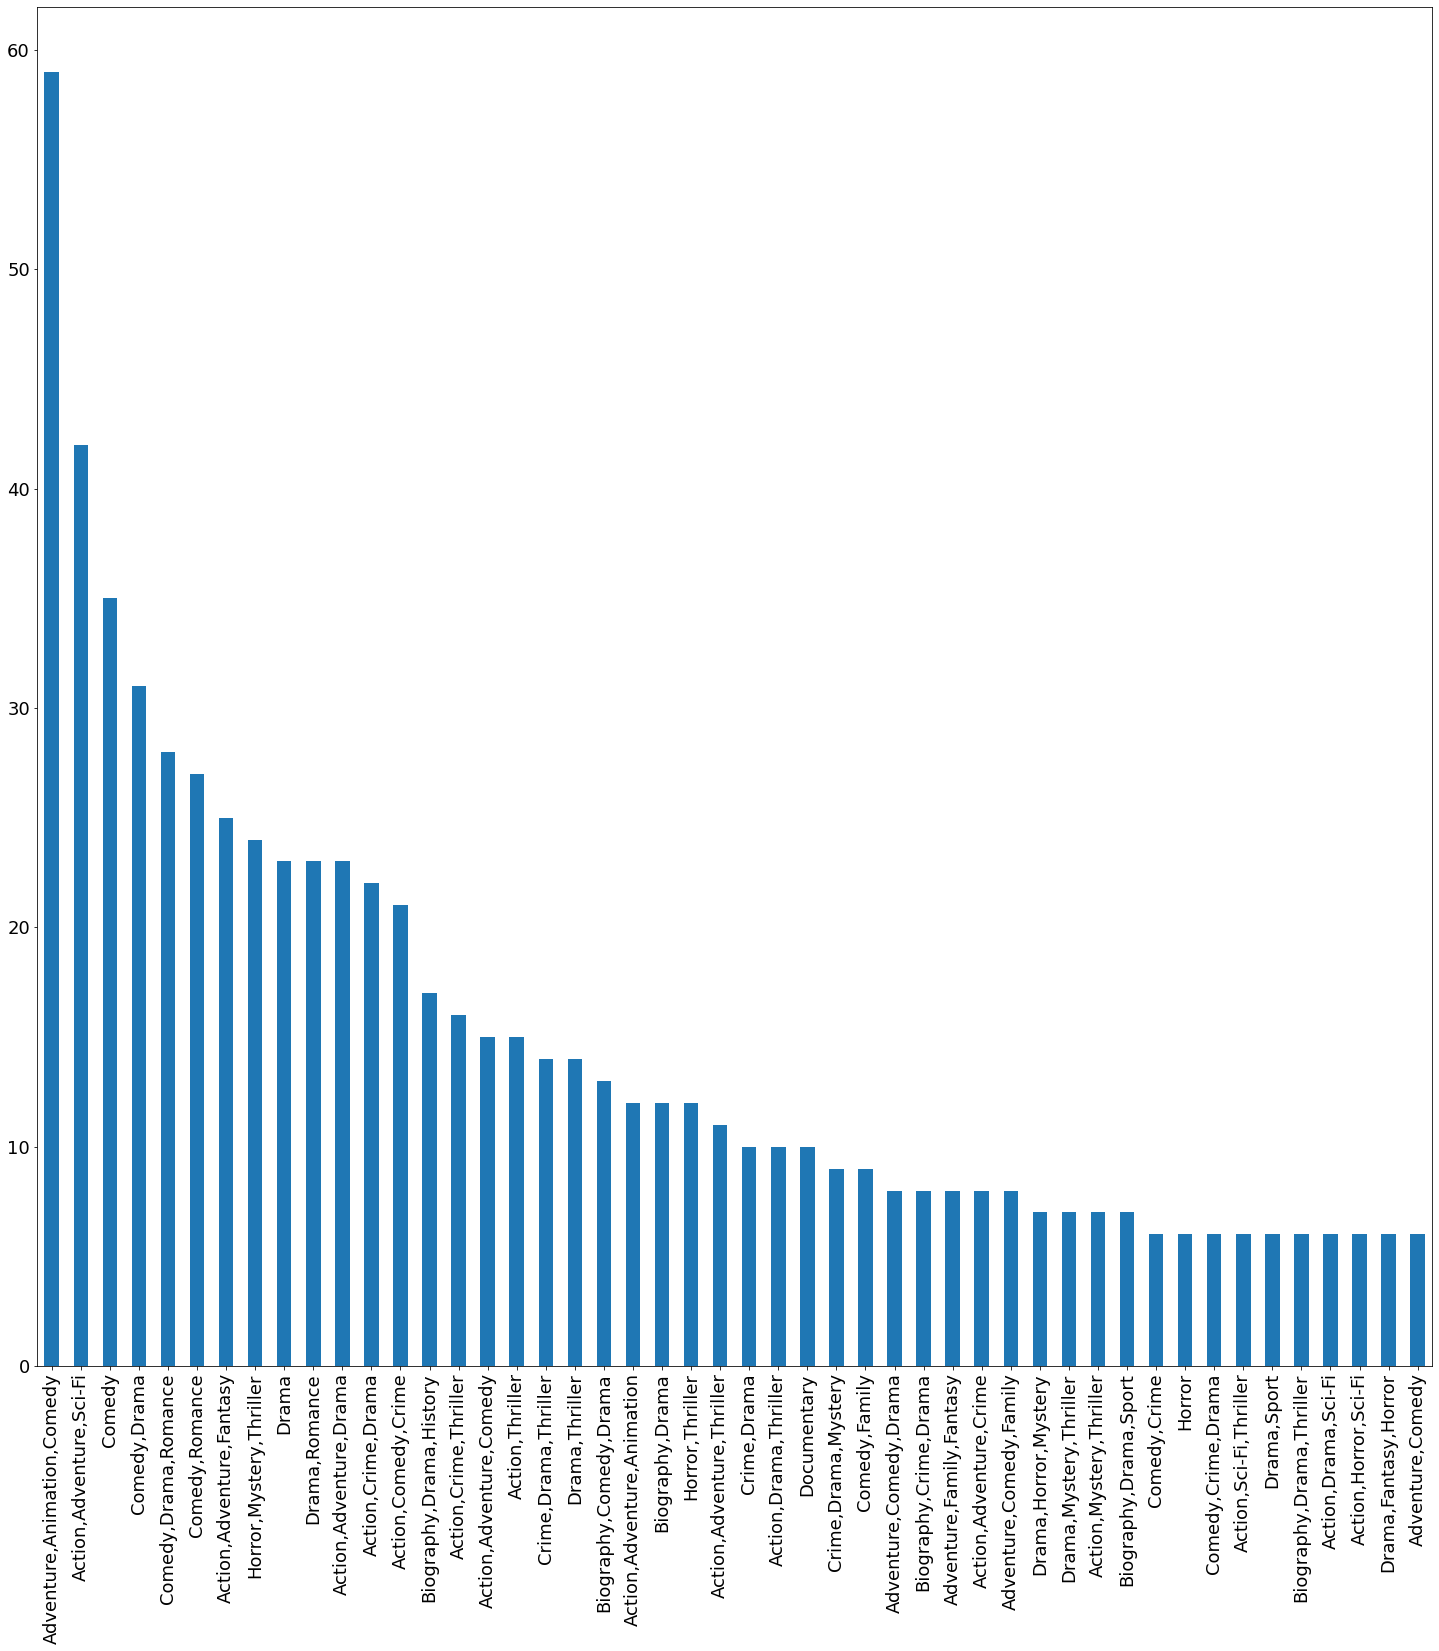

In [47]:
bool_mask.plot.bar(title='',x='Genres',fontsize=18,rot=90,figsize=(25,25))

<AxesSubplot:>

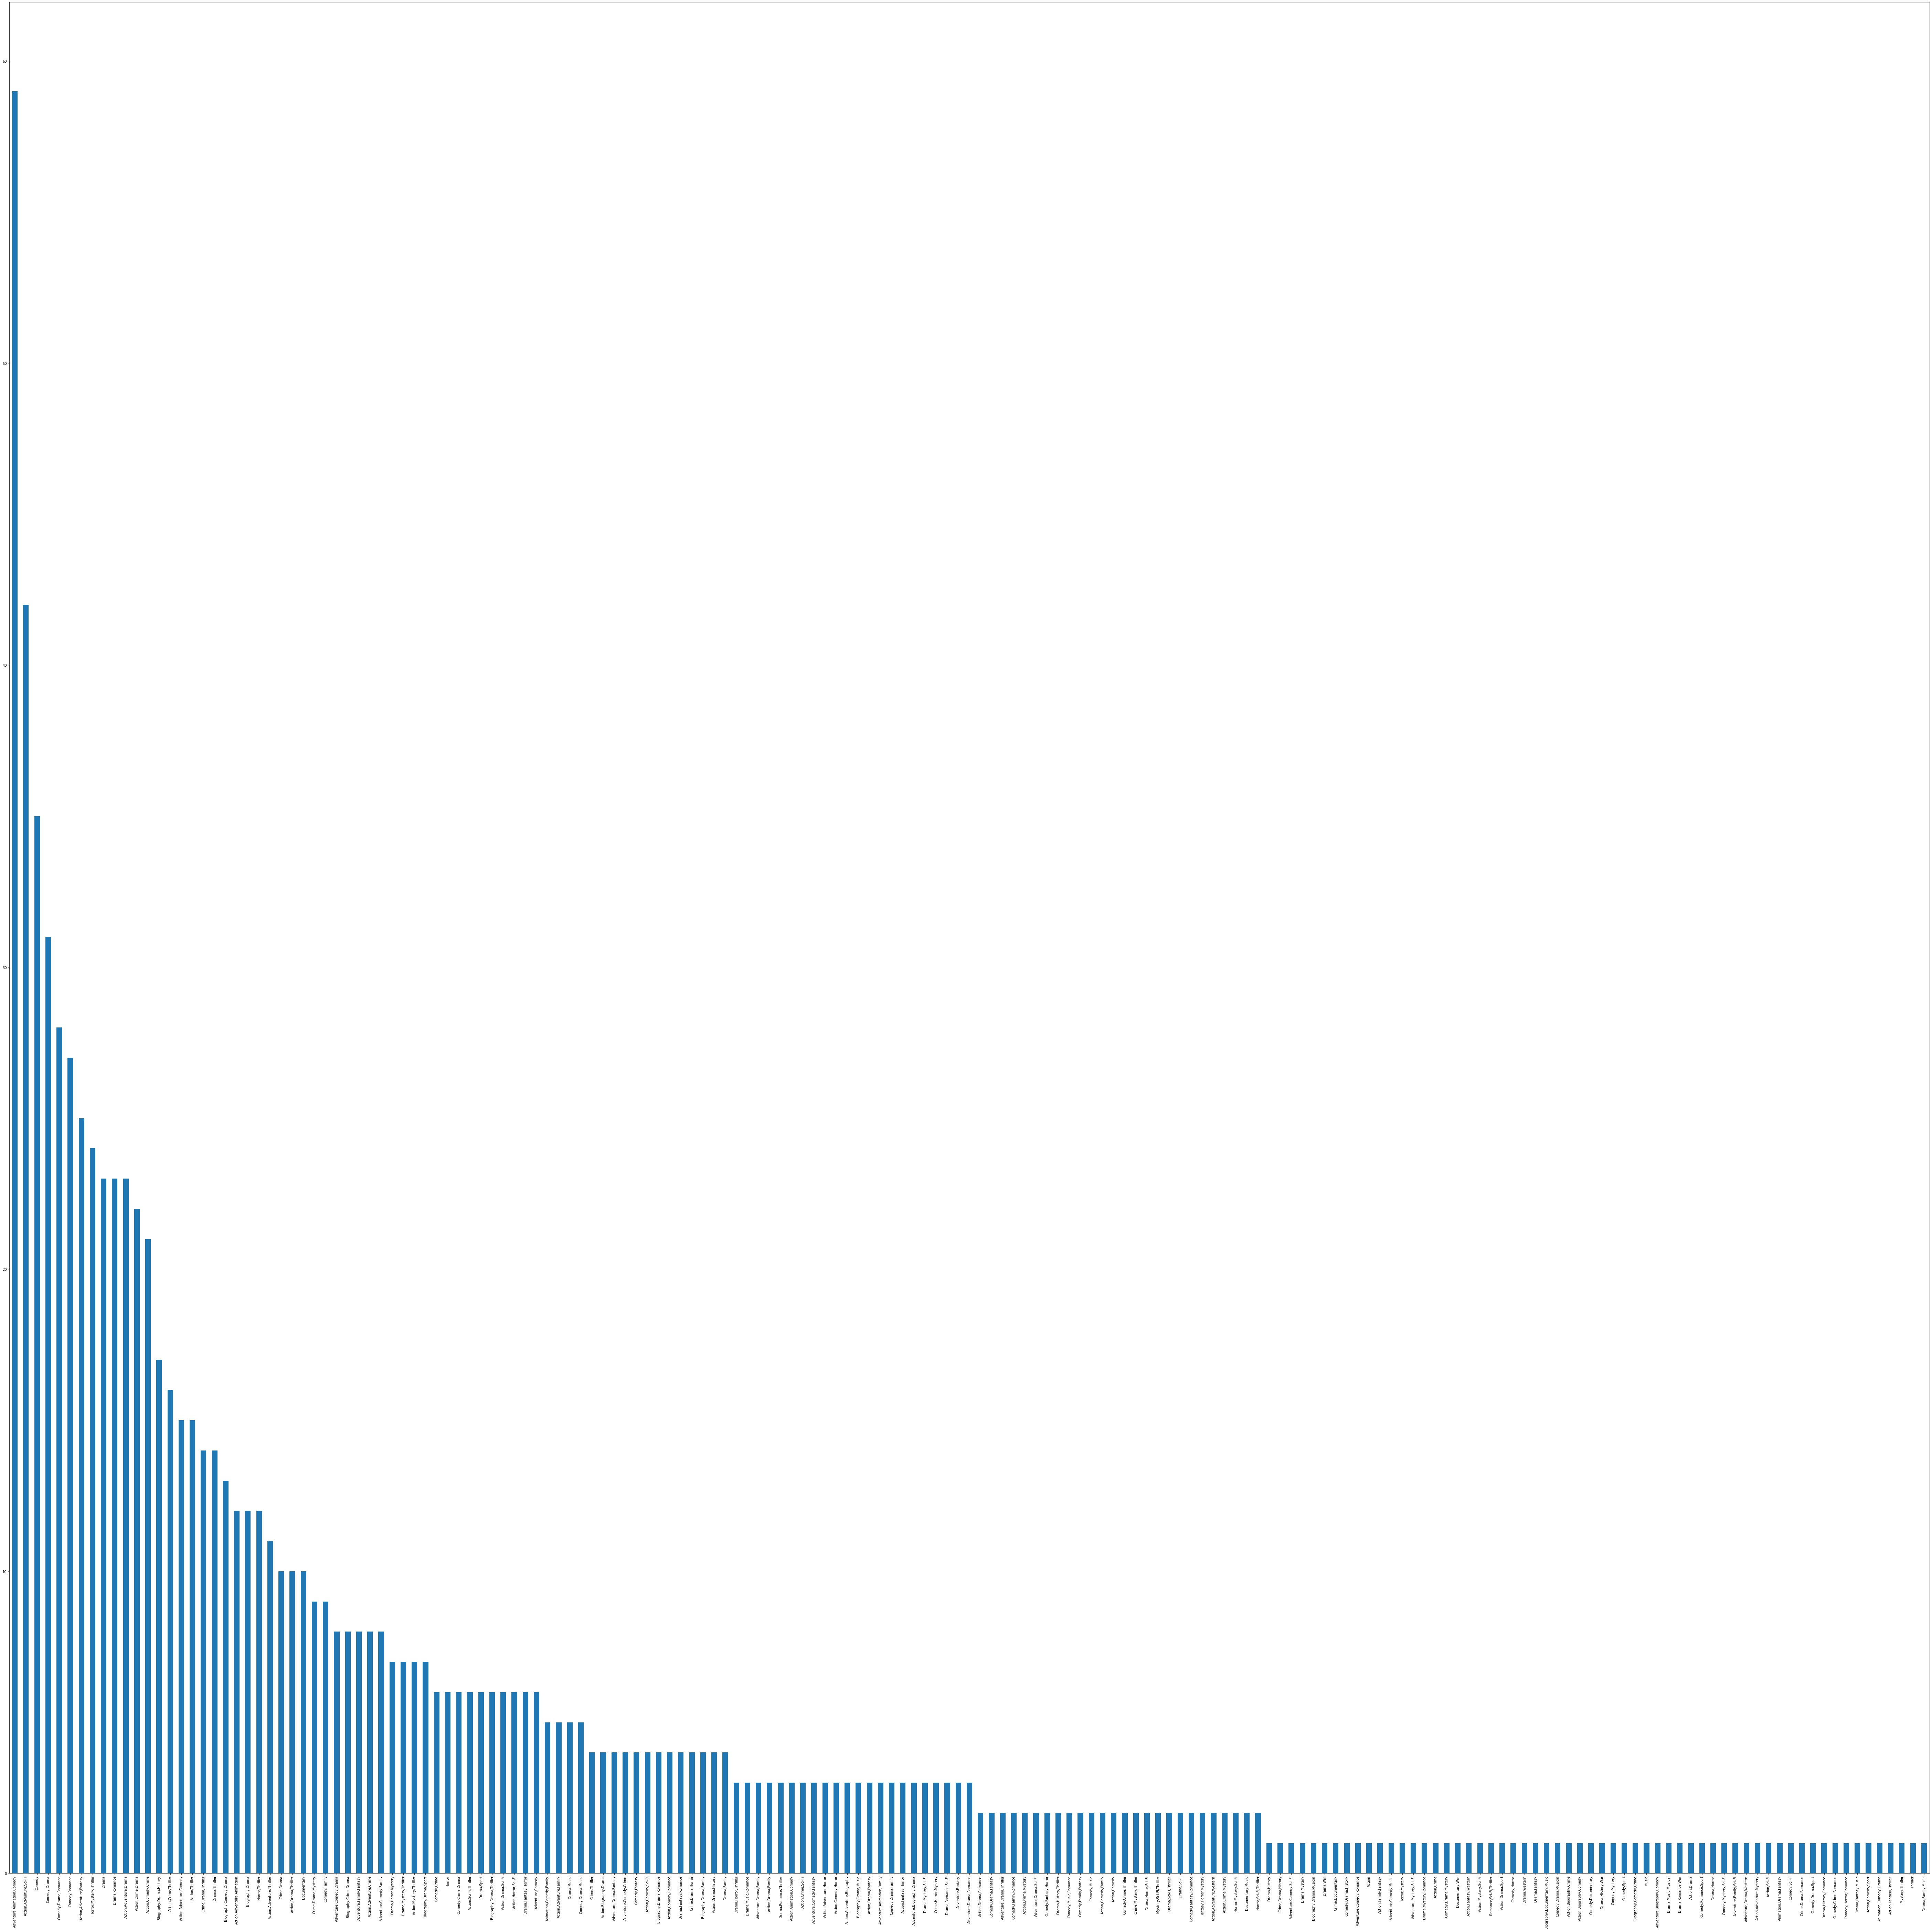

In [48]:
df['genres'].value_counts().plot.bar(figsize=(100,100))

In [49]:
df.insert(5, "roi",roi, True)

In [50]:
df

,title,studio,domestic_gross_x,foreign_gross,total_gross,roi,year,tconst,original_title,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_y,worldwide_gross
583,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,0.893563,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",330600000.0,"$459,005,868",1.403014e+09
880,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,1.195332,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",200000000.0,"$700,059,566",1.348258e+09
881,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,1.452059,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",170000000.0,"$417,719,760",1.305773e+09
374,Frozen,BV,400700000.0,875700000.0,1.276400e+09,2.129560,2013,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",56,"Nov 22, 2013",150000000.0,"$400,738,009",1.272470e+09
882,Incredibles 2,BV,608600000.0,634200000.0,1.242800e+09,2.163873,2018,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",44,"Jun 15, 2018",200000000.0,"$608,581,744",1.242521e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,The Tempest,Mira.,278000.0,68700.0,3.467000e+05,5.045818,2010,tt1274300,The Tempest,110.0,"Comedy,Drama,Fantasy",1,"Dec 10, 2010",20000000.0,"$277,943",2.779430e+05
137,The Tempest,Mira.,278000.0,68700.0,3.467000e+05,5.222029,2010,tt1683003,The Tempest,131.0,Drama,1,"Dec 10, 2010",20000000.0,"$277,943",2.779430e+05
138,Welcome to the Rileys,Gold.,159000.0,158000.0,3.170000e+05,4.056167,2010,tt1183923,Welcome to the Rileys,110.0,Drama,12,"Oct 29, 2010",10000000.0,"$152,857",3.559190e+05
878,City of Ghosts,IFC,128000.0,100000.0,2.280000e+05,2.712973,2017,tt6333056,City of Ghosts,92.0,"Documentary,War",64,"Apr 25, 2003",17500000.0,"$325,491",3.254910e+05


Text(0, 0.5, 'ROI')

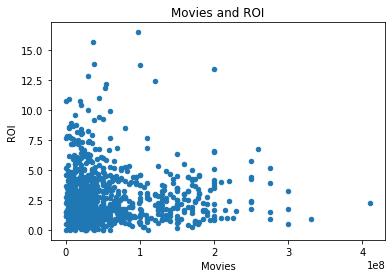

In [51]:
df.plot.scatter(x='production_budget',y='roi')
plt.title("Movies and ROI")
plt.xlabel("Movies")
plt.ylabel("ROI")

Text(0, 0.5, 'Gross')

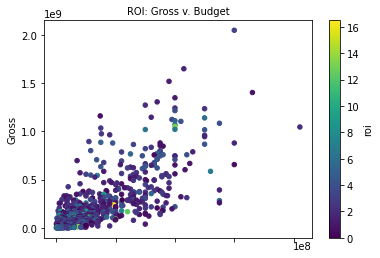

In [57]:
df.plot.scatter(x='production_budget',y='worldwide_gross',c='roi',colormap='viridis')
plt.title("ROI: Gross v. Budget",fontsize=10)
plt.xlabel("Budget",fontsize=10)
plt.ylabel("Gross",fontsize=10)


In [ ]:
#clustering near the bottom left, yet a more positive correlation toward a larger budget having a higher ROI

In [59]:
group_genre = df.groupby(['genres']).mean()
group_genre = group_genre.sort_values(by='total_gross',ascending=False)
group_genre.head(10)

,domestic_gross_x,foreign_gross,total_gross,roi,year,runtime_minutes,id,production_budget,worldwide_gross
genres,,,,,,,,,
"Adventure,Fantasy",1.929000e+08,5.111333e+08,7.040333e+08,1.643094,2013.333333,139.666667,36.333333,2.316667e+08,7.012107e+08
"Adventure,Drama,Sci-Fi",2.082000e+08,4.455500e+08,6.537500e+08,2.238255,2014.500000,156.500000,39.000000,1.365000e+08,6.608254e+08
"Action,Adventure,Sci-Fi",2.584690e+08,3.879643e+08,6.464334e+08,3.041076,2014.000000,132.595238,44.904762,1.771333e+08,7.015004e+08
"Comedy,Mystery",2.545000e+08,3.323000e+08,5.868000e+08,1.135468,2011.000000,102.000000,39.000000,8.000000e+07,5.864643e+08
"Action,Adventure,Animation",1.796333e+08,3.401000e+08,5.197333e+08,2.810515,2013.000000,99.583333,43.750000,1.383333e+08,5.177298e+08
"Action,Adventure,Comedy",1.718133e+08,2.911733e+08,4.629867e+08,2.526852,2015.533333,111.866667,41.000000,1.018667e+08,4.628631e+08
"Adventure,Animation,Comedy",1.553627e+08,2.892661e+08,4.446288e+08,2.756659,2014.118644,94.423729,45.305085,1.079237e+08,4.446385e+08
"Action,Adventure,Fantasy",1.429800e+08,2.970440e+08,4.400240e+08,2.506239,2015.040000,119.080000,50.520000,1.566240e+08,4.374298e+08
"Biography,Drama,Musical",1.743000e+08,2.607000e+08,4.350000e+08,1.147312,2017.000000,105.000000,25.000000,8.400000e+07,3.866656e+08


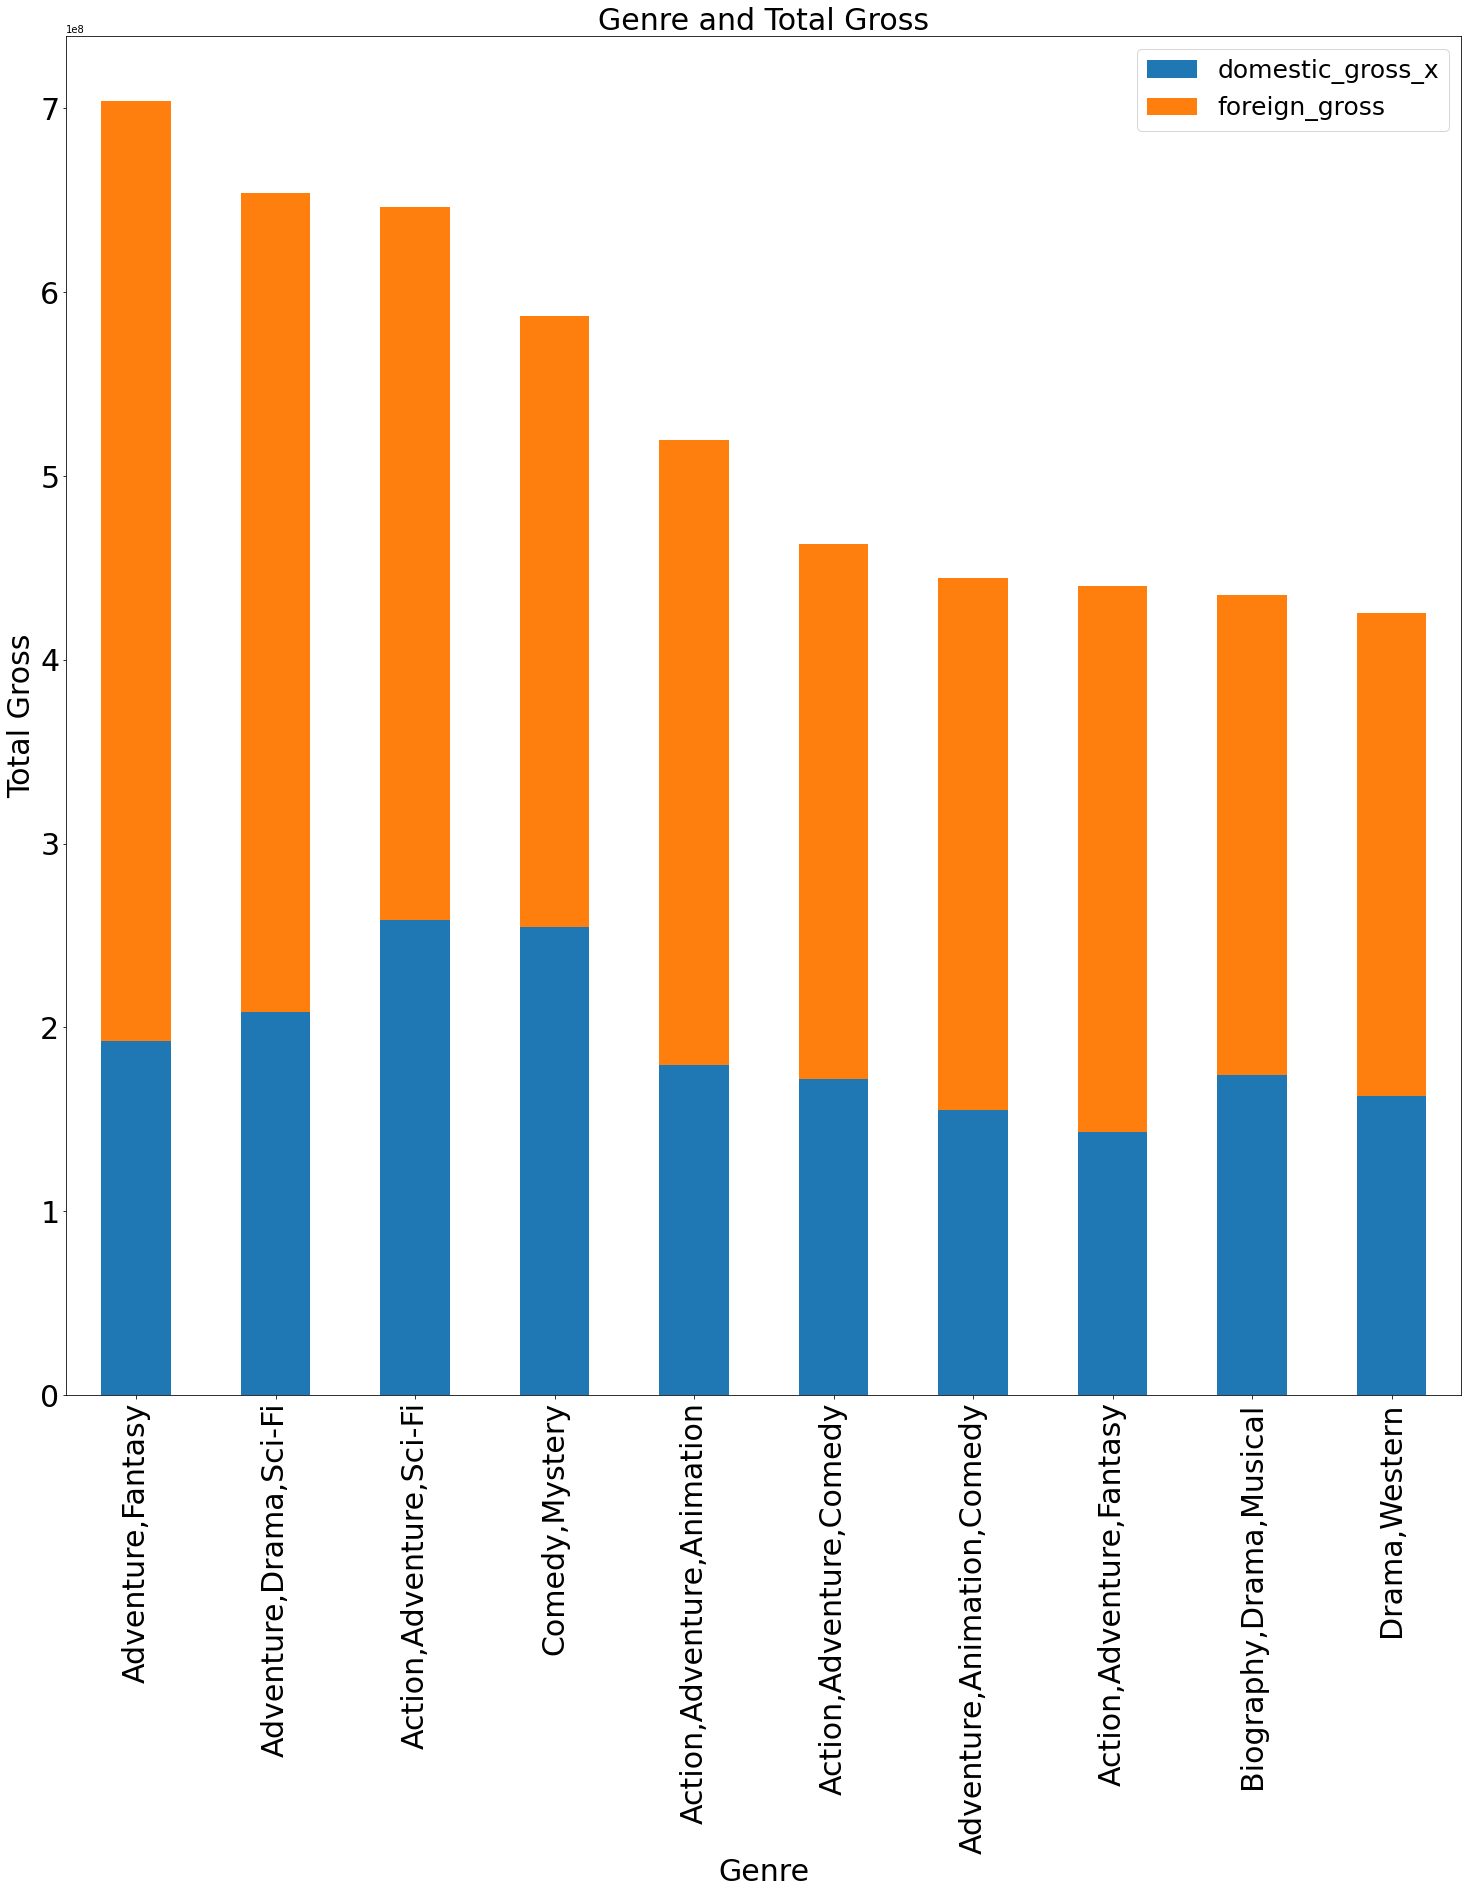

In [60]:
group_genre.head(10).plot.bar(y=['domestic_gross_x','foreign_gross'],stacked=True,fontsize=30,rot=90,figsize=(25,25))
plt.title("Genre and Total Gross",fontsize=30)
plt.xlabel("Genre",fontsize=30)
plt.ylabel("Total Gross",fontsize=30)
plt.legend(fontsize=25)

In [61]:
rating = pd.read_csv('zippedData/tmdb.movies.csv')

In [62]:
rating.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [63]:
rating.shape

(26517, 10)

In [64]:
rating.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [65]:
df1 = df.merge(rating,on=['title'])

In [68]:
df1.shape

(1123, 25)

In [66]:
df1.head()

,title,studio,domestic_gross_x,foreign_gross,total_gross,roi,year,tconst,original_title_x,runtime_minutes,...,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,0.893563,2015,tt2395427,Avengers: Age of Ultron,141.0,...,1.403014e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
1,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,1.195332,2018,tt1825683,Black Panther,134.0,...,1.348258e+09,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11
2,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,1.195332,2018,tt1825683,Black Panther,134.0,...,1.348258e+09,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,7.4,12365
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,1.452059,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,...,1.305773e+09,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,6.5,5995
4,Frozen,BV,400700000.0,875700000.0,1.276400e+09,2.129560,2013,tt2294629,Frozen,102.0,...,1.272470e+09,148,[53],44363,en,Frozen,9.678,2010-02-05,5.8,987


TypeError: 'AxesSubplot' object is not subscriptable

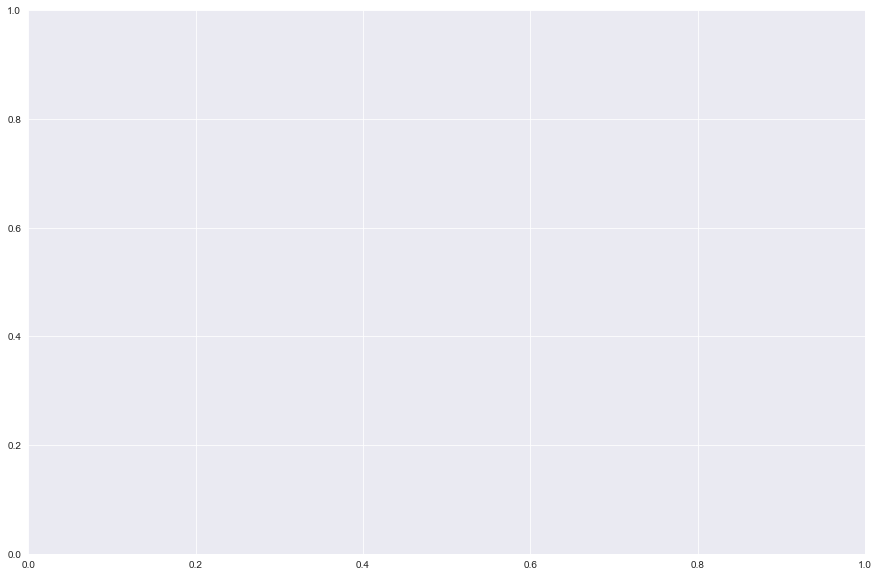

In [79]:
fig, ax = plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')

regplot = sns.regplot(x='vote_average',y='total_gross',data=df1)

regplot.set_xlabel('Average IMDB Fan Rating (out of 10)', fontsize=18)
regplot.set_ylabel('Total Gross (in billions of dollars)', fontsize=20)
regplot.set_title('Avg Fan Rating vs. Total Gross Revenue', fontsize=25)

plt.xticks([1,2,3,4,5,6,7,8,9,10],fontsize=15)
plt.yticks(fontsize=15);

TypeError: 'AxesSubplot' object is not subscriptable

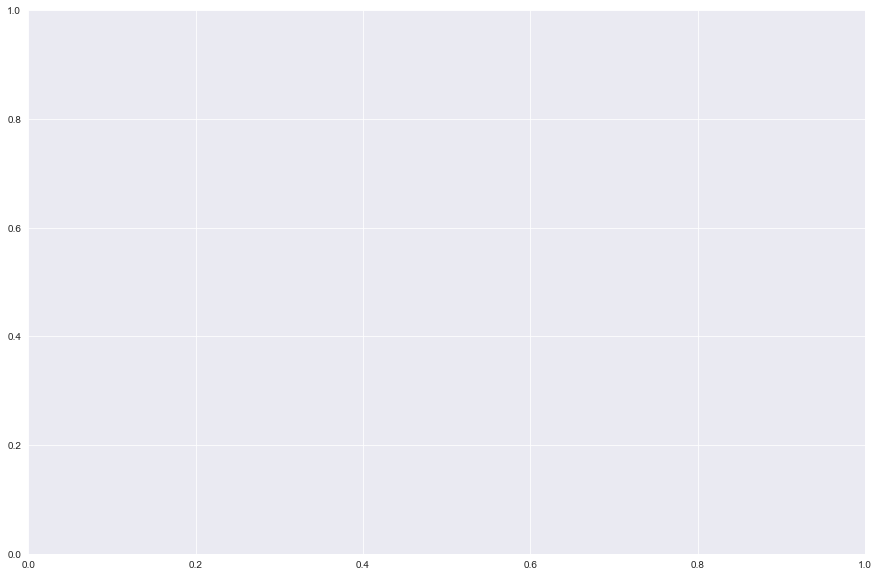

In [80]:
fig, ax = plt.subplots(figsize=(15,10))

sns.set_style('darkgrid')

regplot = sns.regplot(x='averagerating', y='total_gross', data=df1)


regplot.set_xlabel('Average IMDB Fan Rating (out of 10)', fontsize=18)
regplot.set_ylabel('Total Gross (in billions of dollars)', fontsize=20)
regplot.set_title('Avg Fan Rating vs. Total Gross Revenue', fontsize=25)

plt.xticks([1,2,3,4,5,6,7,8,9,10],fontsize=15)
plt.yticks(fontsize=15);
